In [9]:
# import sys
# import torch
# from torch.utils.data import DataLoader
# from torch import nn
# import torch.nn.functional as F

# import torchvision.datasets as datasets
# from torchvision.transforms import ToTensor
# mnist_train = datasets.FashionMNIST(root='./data', download=True, train=True, transform=ToTensor())
# mnist_test = datasets.FashionMNIST(root='./data', download=True, train=False, transform=ToTensor())

# train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
# test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

import torch
from torch import nn

from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.FashionMNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.FashionMNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)


Accuracy on validation data: 0.8797


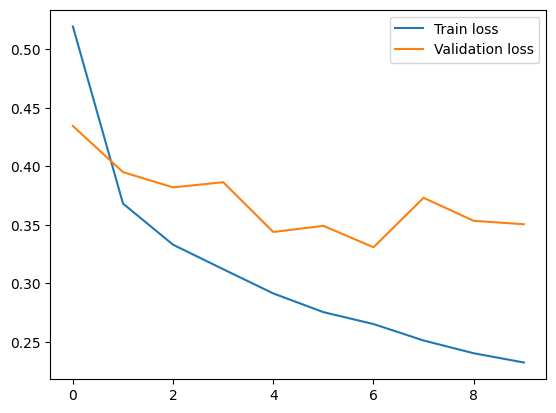

In [ ]:
# import matplotlib.pyplot as plt

# model = nn.Sequential(
#     nn.Linear(784, 500),
#     nn.ReLU(),
#     nn.Linear(500, 50),
#     nn.ReLU(),
#     nn.Linear(50, 50),
#     nn.ReLU(),
#     nn.Linear(50, 10)
# )

# loss_fn = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# train_losses = []
# val_losses = []
# for i in range(0, 10):
#     model.train()
#     loss_sum = 0
#     for X, y in train_dataloader:
#         X = X.reshape((-1, 784))
#         y = F.one_hot(y, num_classes=10).type(torch.float32)

#         optimizer.zero_grad()
#         outputs = model(X)
#         loss = loss_fn(outputs, y)
#         loss.backward()
#         optimizer.step()

#         loss_sum+=loss.item()
#     train_losses.append(loss_sum / len(train_dataloader))

#     val_loss_sum = 0
#     model.eval()
#     with torch.no_grad():
#         for X, y in test_dataloader:
#             X = X.reshape((-1, 784))
#             y = F.one_hot(y, num_classes=10).type(torch.float32) 
#             outputs = model(X)
#             loss = loss_fn(outputs, y)
#             val_loss_sum+=loss.item()
#     val_losses.append(val_loss_sum / len(test_dataloader))
        
# model.eval()
# with torch.no_grad():
#     accurate = 0
#     total = 0
#     for X, y in test_dataloader:
#         X = X.reshape((-1, 784))
#         outputs = nn.functional.softmax(model(X), dim=1) 
#         correct_pred = (y == outputs.max(dim=1).indices)
#         total+=correct_pred.size(0)
#         accurate+=correct_pred.type(torch.int).sum().item()
#     print("Accuracy on validation data:", accurate / total)


# plt.plot(train_losses, label="Train loss")
# plt.plot(val_losses, label="Validation loss")
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

model = nn.Sequential(nn.Linear(784, 500), nn.ReLU(), nn.Linear(500, 50), nn.ReLU(), nn.Linear(50, 50), nn.ReLU(), nn.Linear(50, 10))
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

for i in range(10):

    model.train()
    loss_sum = 0

    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
    
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()

    val_losses.append(val_loss_sum / len(test_dataloader))

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))
        outputs = nn.functional.softmax(model(X), dim=1)
        correct_pred = (y == outputs.max(dim=1).indices)
        total += correct_pred.size(0)
        accurate += correct_pred.type(torch.int).sum().item()
    print("Accuracy on validation data:", accurate / total)


plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

# Our model is learning that we created earlier. The train loss is going down. Here the validation loss is approaching. Well maybe we could train a little bit longer but it's almost flat here. So we are either we are already overfitting. But we can also argue it's still slightly decreasing here. And in that case we could train a little bit longer and improve the performance a little bit.



Accuracy on validation data: 0.8746


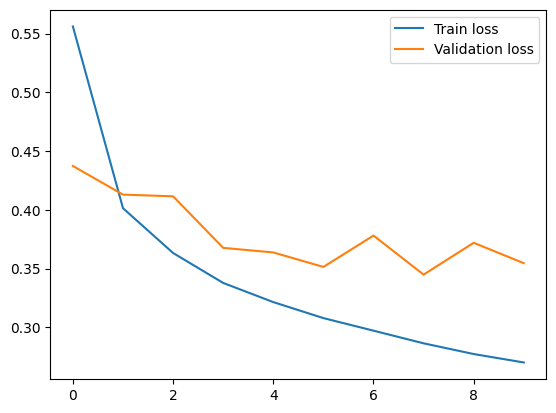

In [11]:
import matplotlib.pyplot as plt

# Same code again here for a more simple network where we skip one layer altogether

model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32) 
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))
        

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))
        outputs = nn.functional.softmax(model(X), dim=1) 
        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print("Accuracy on validation data:", accurate / total)

plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

In [ ]:
# maybe we could try to tune the model architecture. Maybe we could get it to, um, one 2% more or something like this. But overall, this is our baseline.

In [ ]:
# because the more intuition we can give to our network. That is correct. Um, the better the network will be able to fit or to describe the data.